# Regresión Lineal simple (Descenso del gradiente)

In [1]:
import numpy as numpy
import pandas as panda
import matplotlib.pyplot as plt
%matplotlib inline

tornado = panda.read_csv('tornadosEDA.csv')
tornado

,Unnamed: 0,yr,mo,dy,date,time,st,stf,mag,inj,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,0,1950,10,1,1950-10-01,21:00:00,36,40,1.0,0,...,-102.3000,15.80,10,1,1,25,0,0,0,0
1,1,1950,10,9,1950-10-09,02:15:00,27,37,3.0,3,...,0.0000,2.00,880,1,1,47,0,0,0,0
2,2,1950,11,20,1950-11-20,02:20:00,17,21,2.0,0,...,0.0000,0.10,10,1,1,177,0,0,0,0
3,3,1950,11,20,1950-11-20,04:00:00,17,21,1.0,0,...,0.0000,0.10,10,1,1,209,0,0,0,0
4,4,1950,11,20,1950-11-20,07:30:00,25,28,1.0,3,...,0.0000,2.00,37,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67932,68687,2022,9,28,2022-09-28,03:56:00,9,12,0.0,0,...,-80.0680,0.20,50,1,1,99,0,0,0,0
67933,68688,2022,9,28,2022-09-28,13:32:00,9,12,0.0,0,...,-80.8841,3.00,100,1,1,9,0,0,0,0
67934,68689,2022,9,30,2022-09-30,10:25:00,27,37,0.0,0,...,-78.3011,0.74,20,1,1,19,0,0,0,0
67935,68691,2022,9,4,2022-09-04,15:44:00,35,39,0.0,0,...,-80.6555,0.07,15,1,1,99,0,0,0,0


In [2]:
tdf = tornado[['yr', 'st', 'stf', 'mag', 'inj', 'fat', 'loss', 'slat', 'slon', 'elat', 'elon', 'len', 'wid']]
tdf

,yr,st,stf,mag,inj,fat,loss,slat,slon,elat,elon,len,wid
0,1950,36,40,1.0,0,0,50000.000000,36.7300,-102.5200,36.8800,-102.3000,15.80,10
1,1950,27,37,3.0,3,0,500000.000000,34.1700,-78.6000,0.0000,0.0000,2.00,880
2,1950,17,21,2.0,0,0,500000.000000,37.3700,-87.2000,0.0000,0.0000,0.10,10
3,1950,17,21,1.0,0,0,500000.000000,38.2000,-84.5000,0.0000,0.0000,0.10,10
4,1950,25,28,1.0,3,0,50000.000000,32.4200,-89.1300,0.0000,0.0000,2.00,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67932,2022,9,12,0.0,0,0,2000.000000,26.5282,-80.0680,26.5282,-80.0680,0.20,50
67933,2022,9,12,0.0,0,0,50171.550899,28.0830,-80.8669,28.1249,-80.8841,3.00,100
67934,2022,27,37,0.0,0,0,50016.511086,33.9128,-78.2882,33.9132,-78.3011,0.74,20
67935,2022,35,39,0.0,0,0,12000.000000,41.0210,-80.6559,41.0220,-80.6555,0.07,15


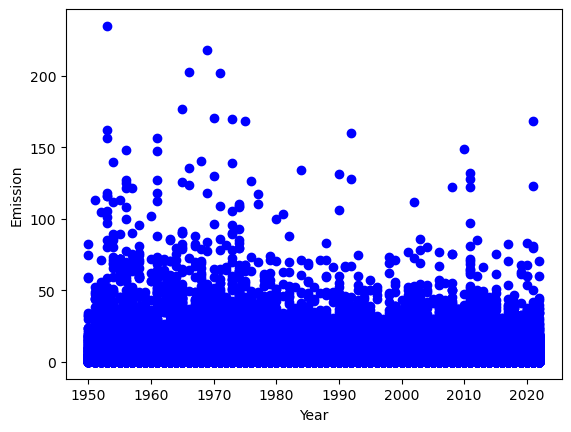

In [3]:
plt.scatter(tdf['yr'], tdf.len,  color='blue')
plt.xlabel("Year")
plt.ylabel("Emission")
plt.show()

In [4]:
msk = len(tdf) < 0.8

In [5]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import metrics

regr = linear_model.LinearRegression()
X_tornado = tdf[['st', 'mag', 'inj', 'fat', 'loss', 'slat', 'slon', 'elat', 'elon', 'len', 'wid']]
y_tornado = tdf[['yr']]
regr.fit(X_tornado, y_tornado)
# Los coeficientes
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)
y_pred_tornado = regr.predict(X_tornado)
metrics.r2_score(y_tornado, y_pred_tornado)

Coefficients:  [[-3.28785202e-02 -7.26863498e+00 -1.12658494e-02  1.29641817e-01
   2.19930249e-08 -1.27368749e-01  2.18408266e-01  2.15149419e-01
  -1.77341530e-01 -3.60359958e-01  1.58867140e-02]]
Intercept:  [2007.62657595]


0.49550071661815853

In [13]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import metrics

regr = linear_model.LinearRegression()
X_tornado = tdf[['st', 'inj', 'slat', 'slon', 'elat', 'elon', 'len', 'wid']]
y_tornado = tdf[['mag']]
regr.fit(X_tornado, y_tornado)
# Los coeficientes
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)
y_pred_tornado = regr.predict(X_tornado)
metrics.r2_score(y_tornado, y_pred_tornado)

Coefficients:  [[ 0.00063507  0.00402589  0.00225372  0.00926364 -0.00113685  0.00171734
   0.03598691  0.00129068]]
Intercept:  [1.38834066]


0.2957226352023431